<a href="https://colab.research.google.com/github/NeetaTaneja/GL/blob/master/R8_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Botanical research

* University’s management require an automation which can create a classifier capable of determining a plant's species from a photo
* train and compare image classifier models using supervised learning
classifier, neural network classifier and a CNN classifier

##  The dataset comprises of images from 12 plant species


Import the data. Analyse the dimensions of the data. Visualise the data

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

In [2]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [4]:
project_path = "/content/gdrive/MyDrive/CNN/Project1"
train_file = "Dataset - Plant-seedlings-classification.zip"
test_file = "Dataset - Images.zip"
predictions_file = "Dataset - Prediction.zip"

In [5]:
import os
os.chdir(project_path)

In [6]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + train_file,'r') as z:
#  z.extractall()

In [7]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + test_file,'r') as z:
#  z.extractall()

In [8]:
#from zipfile import ZipFile
#with ZipFile(project_path + "/" + predictions_file,'r') as z:
#    z.extractall()

In [9]:
X = []
y = []

In [10]:
os.listdir()

['Dataset - Images.zip',
 'Dataset - Prediction.zip',
 'Images',
 'Prediction',
 '__MACOSX',
 'test',
 'train',
 'sample_submission.csv',
 'Dataset - Plant-seedlings-classification.zip',
 'Untitled0.ipynb',
 'R8-Project1_with transfer learning.ipynb',
 'best_model.h5',
 'R8-Project1.ipynb']

In [11]:
os.chdir(project_path + '/train')

In [12]:
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [13]:
import cv2

#### Import the data, resize it to 128*128, store it in X and y

In [14]:
for i in os.listdir():
  #print(i)
  for j in os.listdir(i):
    file_name = project_path + "/train" + "/" + i + "/" + j
    #file_name = "/content/train" + "/" + i + "/" + j
    #print(file_name)
    #print(file_name)
    temp = cv2.imread(file_name)
    temp = cv2.resize(temp, (128,128))
    X.append(temp)
    y.append(i)

### Analyze the dimensions of the data

In [15]:
print("Number of images in X = ",len(X))
print("Shape of each image in X ", X[0].shape)

Number of images in X =  4750
Shape of each image in X  (128, 128, 3)


In [16]:
import numpy as np
print("There are {} unique classes to predict.".format(np.unique(y).shape[0]))

There are 12 unique classes to predict.


### Visualize a few elements and their labels

Label: Black-grass


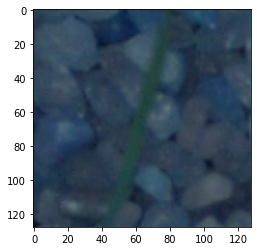

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y[100]))
plt.imshow(X[100], cmap='gray')

Label: Cleavers


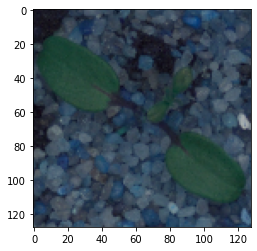

In [18]:
print("Label: {}".format(y[800]))
plt.imshow(X[800], cmap='gray')

Label: Charlock


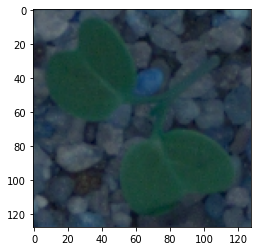

In [19]:
print("Label: {}".format(y[300]))
plt.imshow(X[300], cmap='gray')

Shape of each image in the training data:  (128, 128, 3)


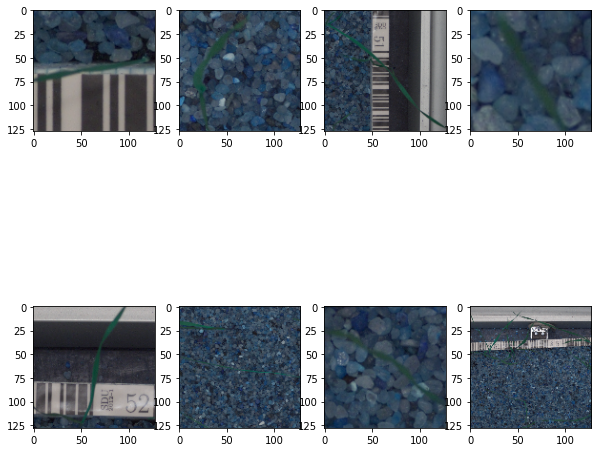

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = X[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print('Shape of each image in the training data: ', X[0].shape)

### Normalize the data

Convert the list to an array of images

In [21]:
X = np.array(X).reshape(4750,128,128,3)

Divide by 255 so that all the data is in the range 0 to 1

In [22]:
X = X.astype('float32')
X/=255

Label encode the lsit of labels to convert the labels from string to integer value

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [24]:
print("Unique values of labels after encoding are ", np.unique(y))

Unique values of labels after encoding are  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [25]:
y[900]

2

### Fit the Logistic Regression classifier

##### Split the data in test and train set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [27]:
print ("Size of X_train = ",X_train.shape)
print ("Size of y_train = ",y_train.shape)
print ("Size of X_test = ",X_test.shape)
print ("Size of y_test = ",y_test.shape)

Size of X_train =  (3562, 128, 128, 3)
Size of y_train =  (3562,)
Size of X_test =  (1188, 128, 128, 3)
Size of y_test =  (1188,)


X_train and X_test contain greyscale RGB codes while y_train and y_test contains labels from 0 to 9 which represents which seedling they actually are.

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [29]:
X_train = [x.flatten() for x in X_train]
X_test = [x.flatten() for x in X_test]

In [30]:
X_train[0].shape

(49152,)

In [31]:
X_train[0]

array([0.13725491, 0.16078432, 0.23529412, ..., 0.1254902 , 0.21960784,
       0.34117648], dtype=float32)

In [32]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Make predictions on logistic regression
- use trained logistic regression model to make predictions on X_test

In [33]:
lr_pred = lr.predict(X_test)

#### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [34]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression Test Accuracy")
print(accuracy_score(y_test, lr_pred))
print("*" * 50)
print(classification_report(y_test,lr_pred))

Logistic Regression Test Accuracy
0.4941077441077441
**************************************************
              precision    recall  f1-score   support

           0       0.28      0.21      0.24        63
           1       0.63      0.53      0.58        96
           2       0.59      0.61      0.60        71
           3       0.54      0.56      0.55       156
           4       0.28      0.19      0.22        58
           5       0.45      0.46      0.45       125
           6       0.51      0.70      0.59       149
           7       0.46      0.37      0.41        51
           8       0.45      0.56      0.50       135
           9       0.25      0.16      0.20        56
          10       0.73      0.69      0.71       116
          11       0.36      0.32      0.34       112

    accuracy                           0.49      1188
   macro avg       0.46      0.45      0.45      1188
weighted avg       0.48      0.49      0.48      1188



 Accuracy with Logistic regression = 49.4%

### Use neural networks for training

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [36]:
print ("Size of X_train = ",X_train.shape)
print ("Size of y_train = ",y_train.shape)
print ("Size of X_test = ",X_test.shape)
print ("Size of y_test = ",y_test.shape)

Size of X_train =  (3562, 128, 128, 3)
Size of y_train =  (3562,)
Size of X_test =  (1188, 128, 128, 3)
Size of y_test =  (1188,)


#### One-hot encoding the labels

In [37]:
num_classes = 12
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [38]:
print(y_train[10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,BatchNormalization
from tensorflow.keras import regularizers, optimizers

#### Create the model
  - Reshape layer to flatten the input 
  - Add Batch normalization
  - Add 2 hidden layers with 256 nodes , relu as activation function
  - Add output layer with 12 nodes, softmax as activation function

In [40]:
#Initialize Sequential model
model = Sequential()

#Reshape data from 3D to 1D -> 128x128X3 to 49152
model.add(Reshape((49152,),input_shape=(128,128,3,)))

#Normalize the data
model.add(BatchNormalization())

#Add hidden layer
model.add(Dense(256, activation='relu'))

#Add hidden layer
#model.add(Dense(256, activation='relu'))

#Add hidden layer
model.add(Dense(256, activation='relu'))
        
#Add OUTPUT layer
model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


reshape (None, 128, 128, 3) ==> (None, 49152)
batch_normalization (None, 49152) ==> (None, 49152)
dense (None, 49152) ==> (None, 256)
dense_1 (None, 256) ==> (None, 256)
dense_2 (None, 256) ==> (None, 12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 49152)             196608    
_________________________________________________________________
dense (Dense)                (None, 256)               12583168  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                3084      
Total params: 12,848,652
Trainable params: 12,75

#### Compile the model
   - Optimizer used is 'sgd'
   - learning rate = 0.001 

In [41]:
#Compile the model
sgd_op = tf.keras.optimizers.SGD(lr=0.001,decay=0.01)
model.compile(optimizer=sgd_op, loss='categorical_crossentropy', 
              metrics=['accuracy'])

#### Train the model

In [42]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
112/112 [==============================] - 5s 20ms/step - loss: 2.6470 - accuracy: 0.1376 - val_loss: 2.3736 - val_accuracy: 0.2088
Epoch 2/20
112/112 [==============================] - 2s 14ms/step - loss: 1.9636 - accuracy: 0.3767 - val_loss: 2.2684 - val_accuracy: 0.2744
Epoch 3/20
112/112 [==============================] - 2s 14ms/step - loss: 1.7166 - accuracy: 0.4852 - val_loss: 2.1279 - val_accuracy: 0.3283
Epoch 4/20
112/112 [==============================] - 2s 14ms/step - loss: 1.6063 - accuracy: 0.5214 - val_loss: 2.0094 - val_accuracy: 0.3569
Epoch 5/20
112/112 [==============================] - 2s 14ms/step - loss: 1.5245 - accuracy: 0.5667 - val_loss: 1.9351 - val_accuracy: 0.3662
Epoch 6/20
112/112 [==============================] - 1s 13ms/step - loss: 1.4785 - accuracy: 0.5891 - val_loss: 1.8937 - val_accuracy: 0.3746
Epoch 7/20
112/112 [==============================] - 2s 13ms/step - loss: 1.4148 - accuracy: 0.6046 - val_loss: 1.8678 - val_accuracy: 0.3914

Accuracy on training data is much higher than the validation data => overfitting model.
- Not much difference with change in learning rate
- Better performance with increase in number of epochs, so used number of epochs = 20. Higher value doesn't make much difference.

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.7527817487716675
Test accuracy: 0.43097642064094543


Accuracy with Neural Networks = 44.8%

### Use CNN for training

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,random_state=10)

In [45]:
print ("Size of X_train = ",X_train.shape)
print ("Size of y_train = ",y_train.shape)
print ("Size of X_test = ",X_test.shape)
print ("Size of y_test = ",y_test.shape)

Size of X_train =  (3562, 128, 128, 3)
Size of y_train =  (3562,)
Size of X_test =  (1188, 128, 128, 3)
Size of y_test =  (1188,)


##### One-hot encoding the labels

In [46]:
num_classes = 12
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

#### Create the model
  - Reshape layer 
  - Add Batch normalization
  - Add 1 hidden layers with 32 filters of size 3X3, relu as activation function
  - Add 1 hidden layer with 64 filters of size 3X3, relu as activation function
  - Add layer for MaxPooling
  - Add dropout layer
  - Add layers for flattening
  - Add Fully Connected Layer with 128 units and activation function as 'relu'
  - Add output layer with 12 nodes, softmax as activation function

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten

tf.keras.backend.clear_session()
# Initialize the model
model = Sequential()

model.add(tf.keras.layers.Reshape((128,128,3),input_shape=(128,128,3)))

model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3,)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with output units and activation function as 'softmax'
model.add(Dense(num_classes, activation="softmax"))

In [48]:
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

reshape (None, 128, 128, 3) ==> (None, 128, 128, 3)
batch_normalization (None, 128, 128, 3) ==> (None, 128, 128, 3)
conv2d (None, 128, 128, 3) ==> (None, 126, 126, 32)
conv2d_1 (None, 126, 126, 32) ==> (None, 124, 124, 64)
max_pooling2d (None, 124, 124, 64) ==> (None, 62, 62, 64)
dropout (None, 62, 62, 64) ==> (None, 62, 62, 64)
flatten (None, 62, 62, 64) ==> (None, 246016)
dense (None, 246016) ==> (None, 128)
dense_1 (None, 128) ==> (None, 12)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
co

#### Compile the model
   - Optimizer used is 'sgd'
   - Add callback for earlyStopping if the validation accuracy is not improving in further runs

#### Train the model

In [49]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/10
112/112 [==============================] - 39s 100ms/step - loss: 5.6426 - accuracy: 0.0982 - val_loss: 2.4385 - val_accuracy: 0.1254
Epoch 2/10
112/112 [==============================] - 11s 94ms/step - loss: 2.2449 - accuracy: 0.2473 - val_loss: 1.9373 - val_accuracy: 0.3207
Epoch 3/10
112/112 [==============================] - 11s 94ms/step - loss: 1.4382 - accuracy: 0.5340 - val_loss: 1.8225 - val_accuracy: 0.4032
Epoch 4/10
112/112 [==============================] - 11s 95ms/step - loss: 0.5974 - accuracy: 0.8184 - val_loss: 1.4449 - val_accuracy: 0.5530
Epoch 5/10
112/112 [==============================] - 11s 95ms/step - loss: 0.2236 - accuracy: 0.9352 - val_loss: 1.6853 - val_accuracy: 0.5657
Epoch 6/10
112/112 [==============================] - 10s 94ms/step - loss: 0.0864 - accuracy: 0.9771 - val_loss: 1.9855 - val_accuracy: 0.5657
Epoch 7/10
112/112 [==============================] - 11s 94ms/step - loss: 0.0588 - accuracy: 0.9878 - val_loss: 2.0579 - val_accuracy

Accuracy on training data has increased to 98% , but on accuracy on test data is much lower 70.54% . This implies overfitting of data 

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.0578501224517822
Test accuracy: 0.554713785648346


Accuracy with CNN = 70.5%

CNN model performs better for this test data as
 - It gives much better accuracy (64.3%) than logistic regression (49%) and neural networks ( 41%)
 - The model executes much faster than the other 2 models.
 - Train data accuracy reaches 93% in 5 iterations only.
 - We can get a even better model with transfer learning

### Save the best performing model

In [75]:
filename = project_path + "/best_model.h5"
model.save(filename)
print("CNN Model saved to file ", filename)

CNN Model saved to file  /content/gdrive/MyDrive/CNN/Project1/best_model.h5


### Import the the image in the “ Prediction” folder to predict the class

In [52]:
os.chdir(project_path + '/Prediction')

In [53]:
os.listdir()

['Predict.png', '.DS_Store']

In [54]:
#x_test = []

In [55]:
file_name = project_path + "/Prediction" + "/" + 'Predict.png'
print(file_name)
temp = cv2.imread(file_name)
temp = cv2.resize(temp, (128,128))
x_test = temp

/content/gdrive/MyDrive/CNN/Project1/Prediction/Predict.png


### Display the image

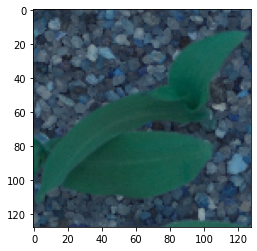

In [56]:
plt.imshow(x_test, cmap='gray')

In [57]:
print("Shape of test image ", x_test.shape)

Shape of test image  (128, 128, 3)


### Use the best trained image classifier model to predict the class.

In [58]:
x_test = x_test.astype('float32')
x_test/=255

In [59]:
y_pred = model.predict(x_test.reshape(1, 128, 128, 3))
predicted_label = y_pred.argmax()
print("Predicted label:" )
print(le.inverse_transform([predicted_label]))

Predicted label:
['Maize']


## Part 2 - Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification

## Part 3 - Build the image dataset to be used by the AI team to build an image classifier data. 

### Import and display the images in python against their labels.

In [60]:
os.chdir(project_path + '/Images')

In [61]:
os.listdir()

['00006.jpg',
 '00007.jpg',
 '00015.jpg',
 '00012.jpg',
 '00009.jpg',
 '00004.jpg',
 '00003.jpg',
 '00010.jpg',
 '00014.jpg',
 '00013.jpg',
 '00002.jpg',
 '00005.jpg',
 '00008.jpg',
 '00001.jpg',
 '00011.jpg',
 'train.csv',
 'test.csv']

In [62]:
#We will build a pandas dataset
import pandas as pd
df = pd.DataFrame(columns=['class', 'image_file'])

In [63]:
#Run through tarfile members 
for i in os.listdir():
      file_name = i
      im_class = os.path.splitext(i)[0]
      #Add record to the dataframe
      df.loc[df.shape[0]] = [im_class, file_name]

In [64]:
#Check contents of the dataframe
print('Total images: ', df.shape[0])
df.head(5)

Total images:  17


,class,image_file
0,00006,00006.jpg
1,00007,00007.jpg
2,00015,00015.jpg
3,00012,00012.jpg
4,00009,00009.jpg


In [65]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [77]:
train_df.to_csv(project_path + "/train.csv",index=False)
test_df.to_csv(project_path + '/test.csv', index=False)

In [67]:
import tensorflow as tf

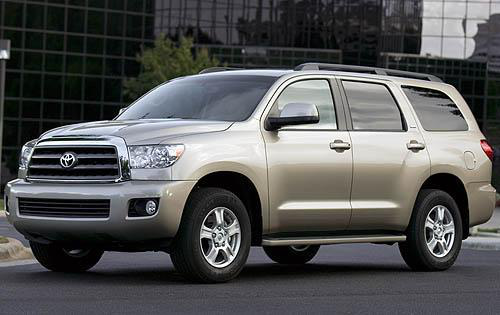

In [68]:
image_file = df['image_file'].iloc[3]
car_image = tf.keras.preprocessing.image.load_img(project_path + "/Images/" + image_file)

#Inspect image
car_image

In [69]:
#Lets check the class type for Keras image
type(car_image)

PIL.JpegImagePlugin.JpegImageFile

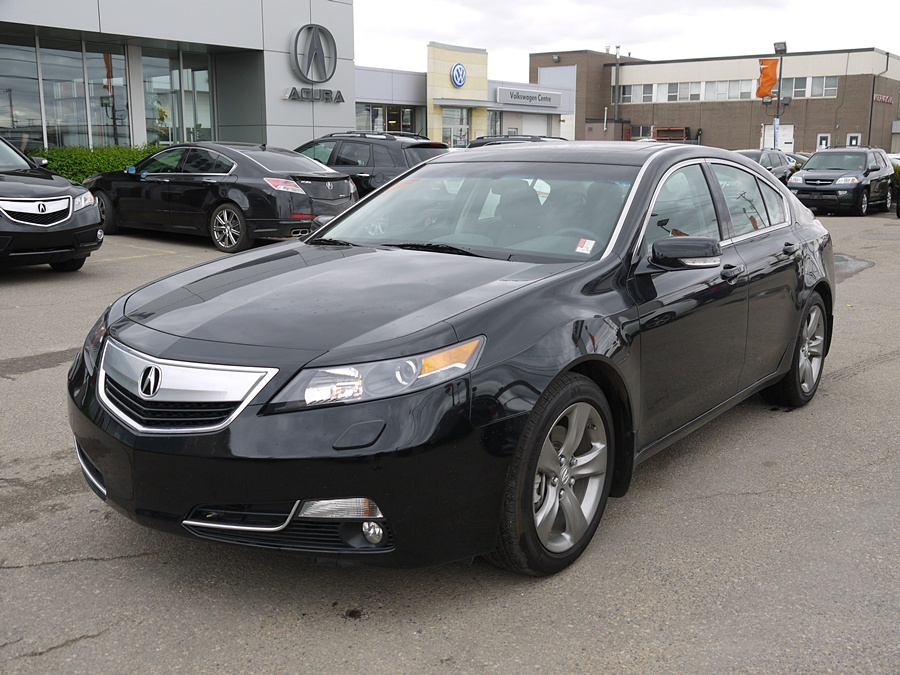

In [70]:
car_image2 = tf.keras.preprocessing.image.load_img(project_path + "/Images/"+  df['image_file'].iloc[10])
car_image2

In [71]:
#Size of the image
print(car_image.size)
print(car_image2.size)

(500, 315)
(900, 675)


In [72]:
#Resizing image
car_image = car_image.resize([128,128])
car_array = tf.keras.preprocessing.image.img_to_array(car_image)
print('Shape of numpy array', car_array.shape)

Shape of numpy array (128, 128, 3)


In [73]:
#Get class names
class_names = train_df['class'].unique().tolist()
print('car classes: ', class_names)

car classes:  ['00005', '00011', '00014', '00001', '00015', '00013', 'test', '00009', '00010', '00002', '00008', '00012', '00003']


label of the image  00006
Shape of the image  (575, 431)
label of the image  00007
Shape of the image  (640, 480)
label of the image  00015
Shape of the image  (640, 424)
label of the image  00012
Shape of the image  (500, 315)
label of the image  00009
Shape of the image  (1280, 843)
label of the image  00004
Shape of the image  (2100, 1386)
label of the image  00003
Shape of the image  (640, 480)
label of the image  00010
Shape of the image  (640, 480)
label of the image  00014
Shape of the image  (800, 600)
label of the image  00013
Shape of the image  (500, 335)
label of the image  00002
Shape of the image  (900, 675)
label of the image  00005
Shape of the image  (144, 108)
label of the image  00008
Shape of the image  (639, 480)
label of the image  00001
Shape of the image  (600, 400)


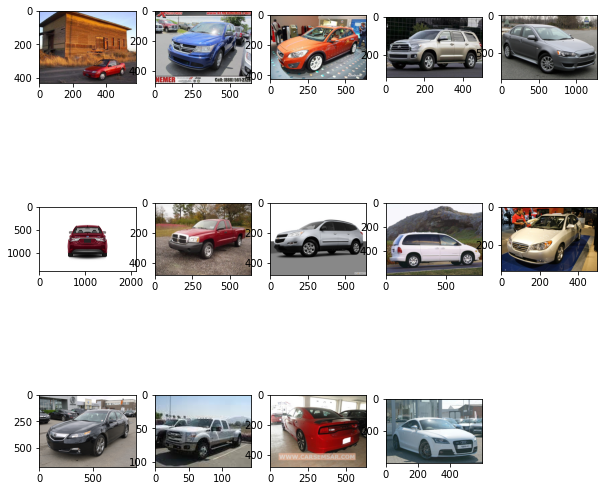

In [74]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 15):
    img = tf.keras.preprocessing.image.load_img(project_path + "/Images/"+  df['image_file'].iloc[i-1])
    fig.add_subplot(3, 5, i)
    plt.imshow(img)
    print ("label of the image ", df['class'].iloc[i-1])
    print('Shape of the image ', img.size)

